# cuSignal Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

# Imports

In [2]:
import cusignal
import cupy as cp
from cupy.fft import fft, fftshift

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# cuSignal convolutions and correlations

#### cusignal.convolution.convolve.choose_conv_method()

In [26]:
data = cp.random.randint(0,2, 300)
window = cusignal.hamming(30)

method = cusignal.choose_conv_method(
    data
    , window
)

method

'direct'

#### cusignal.convolution.convolve.convolve()

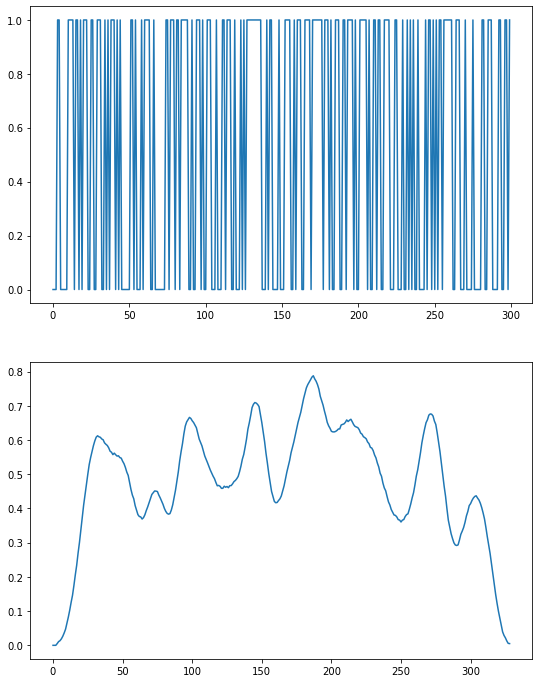

In [29]:
filtered = cusignal.convolve(data, window, method=method)  / cp.sum(window)

### Plot
fig, (signal, fil) = plt.subplots(2,1, figsize=(9,12))

signal.plot(cp.asnumpy(data))
fil.plot(cp.asnumpy(filtered))

#### cusignal.convolution.convolve.fftconvolve()

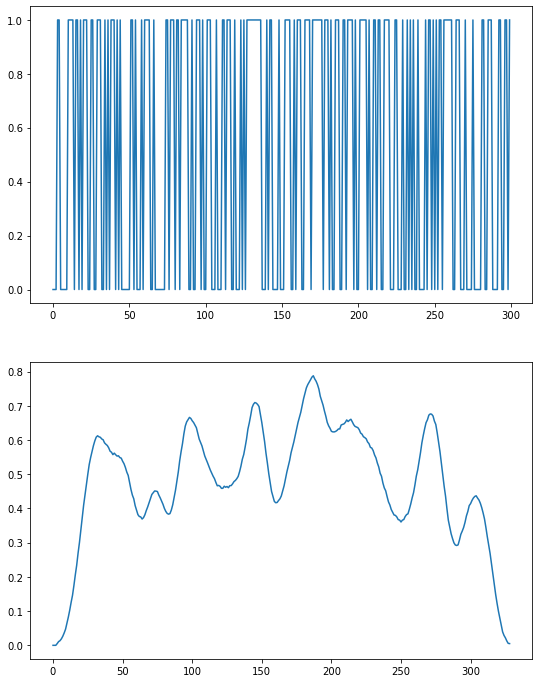

In [31]:
filtered = cusignal.fftconvolve(data, window)  / cp.sum(window)

### Plot
fig, (signal, fil) = plt.subplots(2,1, figsize=(9,12))

signal.plot(cp.asnumpy(data))
fil.plot(cp.asnumpy(filtered))

#### cusignal.convolution.correlate.correlate()

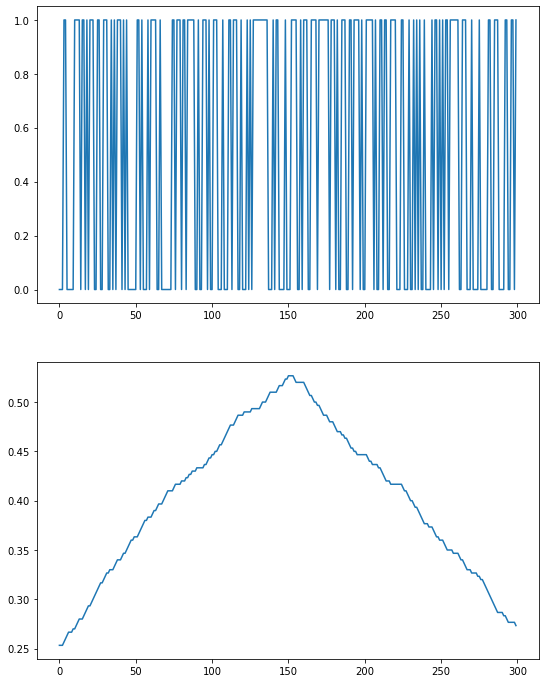

In [37]:
data_noisy = data + cp.random.rand(len(data))
corr = cusignal.correlate(data, cp.ones(len(data)), mode='same') / len(data)

### Plot
fig, (signal, fil) = plt.subplots(2,1, figsize=(9,12))

signal.plot(cp.asnumpy(data))
fil.plot(cp.asnumpy(corr))

#### cusignal.peak_finding.peak_finding.argrelextrema()

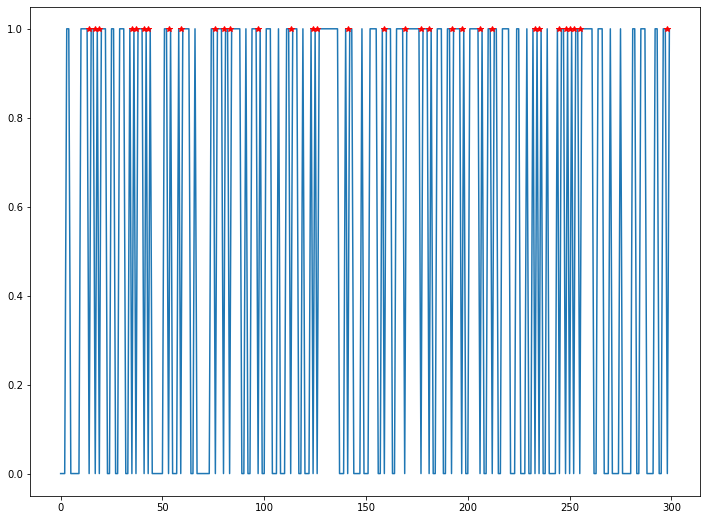

In [45]:
extrema = cusignal.argrelextrema(data, comparator=cp.less)

### Plot
fig, signal = plt.subplots(1,1, figsize=(12,9))

signal.plot(cp.asnumpy(data))
signal.plot(cp.asnumpy(extrema[0]), [1] * len(extrema[0]), 'r*')

#### cusignal.peak_finding.peak_finding.argrelmax()

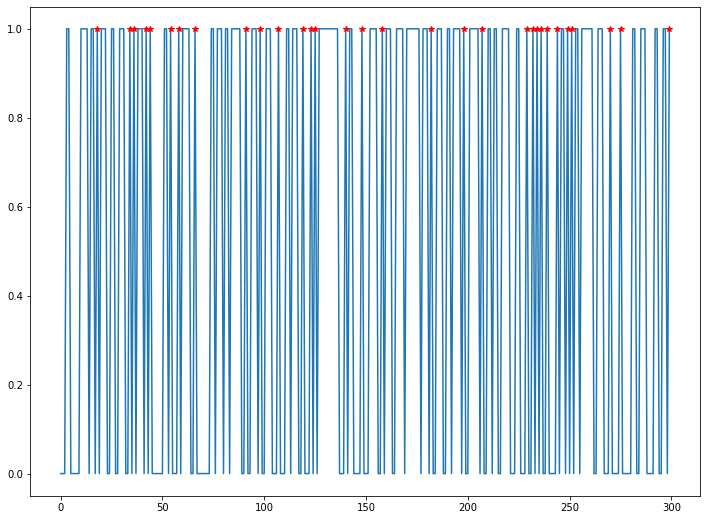

In [47]:
extrema = cusignal.argrelmax(data)

### Plot
fig, signal = plt.subplots(1,1, figsize=(12,9))

signal.plot(cp.asnumpy(data))
signal.plot(cp.asnumpy(extrema[0]), [1] * len(extrema[0]), 'r*')

#### cusignal.peak_finding.peak_finding.argrelmin()

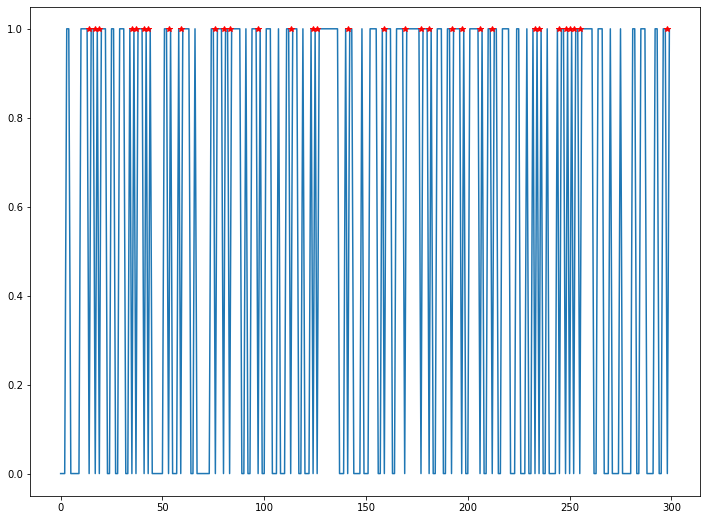

In [48]:
extrema = cusignal.argrelmin(data)

### Plot
fig, signal = plt.subplots(1,1, figsize=(12,9))

signal.plot(cp.asnumpy(data))
signal.plot(cp.asnumpy(extrema[0]), [1] * len(extrema[0]), 'r*')

#### cusignal.waveforms.waveforms.chirp()

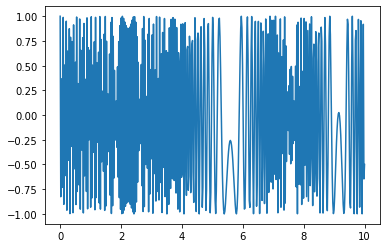

In [55]:
t = cp.linspace(0, 10, 500)

signal = cusignal.chirp(
    t
    , 120
    , 20
    , 500
    , method='quadratic'
)

### Plot
plt.plot(cp.asnumpy(t), cp.asnumpy(signal))

#### cusignal.waveforms.waveforms.gausspulse()

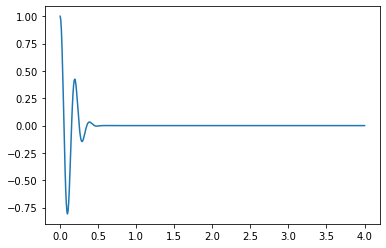

In [60]:
t = cp.linspace(0, 4, 500)

signal = cusignal.gausspulse(
    t
    , fc=5
    , bw=0.5
    , bwr= -6
    , tpr= -60
    , retquad=False
    , retenv=False
)

### Plot
plt.plot(cp.asnumpy(t), cp.asnumpy(signal))

#### cusignal.waveforms.waveforms.square()

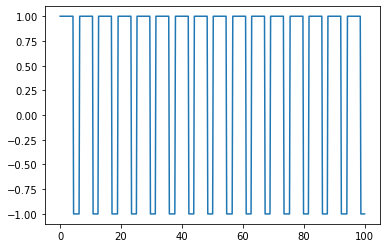

In [65]:
t = cp.linspace(0, 100, 500)

signal = cusignal.square(
    t
    , duty = 0.7
)

### Plot
plt.plot(cp.asnumpy(t), cp.asnumpy(signal))

#### cusignal.waveforms.waveforms.unit_impulse()

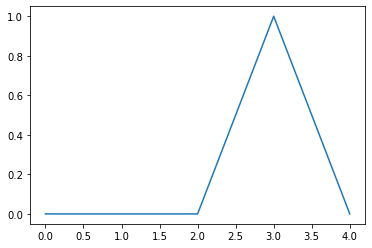

In [69]:
signal = cusignal.unit_impulse(5,3)

### Plot
plt.plot(cp.asnumpy(signal))